# Anaglyph

In this notebook we create some anaglyph gifs. We visualize the making of the animations by following the camera's trajectory with respect to the particles. 

First, import the libraries that we'll use.

In [1]:
from glyph import particles, course, twisty
import numpy as np
#uncomment to draw interactive plots
#%matplotlib widget 
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

Load the particle coordinates. These must be in an [n, 3] array, where n is the number of particles.

Then instanciate the data as a 'particles' object.

Take into account that the camera will be always be looking at the origin [0,0,0] of the reference frame, So you may want to put your particles around there...

In [2]:
data = np.genfromtxt("subh_pos_box.dat")
cube = particles(data)

### Define the camera trajectory

Here comes the fun bit, let's define the trajectory of the camera. 

First instanciate an object 'course' providing an initial position (3 coord). Then add new trajectories setting the final position and, optionally, the number of steps to go to the new position (defaults to 30 steps).

The new trajectories can follow different curves. Currently, the options available are:

- 'line': sets an equally-spaced linear trajectory from the initial position to the final one.

- 'circle': defines a trajectory over the maximum circle that passes through the initial position and the direction of the final position. Another way of thinking of this is that the camera follows the curve that results from the intersection of the plane defined by th initial and final position, and a sphere centred in the origin with radius |initial_position|

- 'helicopter': the initial and final position define a cone. The intersection of the cone with a plane containing the initial position that is perpendicular to the direction of the cone define the curve (a circle) over which this trajectory is defined. The option 'angle' defines the way way and how much of the curve will be followed (in radians, retrograde spin if negative)

After adding a trajectory, its final position becomes the initial one in order to form a continuous trail for the camera.

In [3]:
vid_cam = course([20, 0 ,10])
vid_cam.line([0 ,20, 10], steps=100)
vid_cam.line([-20, 0, 10], steps=100)
vid_cam.line([0, -20, 10], steps=100)
vid_cam.line([20, 0, 10], steps=100)

We plot the camera trajectory (starting in purple and finishing in yellow) together with the set of particles. 

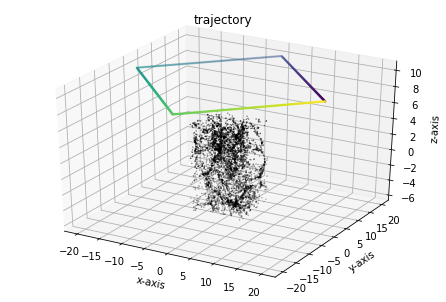

In [4]:
fig = plt.figure()
ax = Axes3D(fig)
 

ax.scatter(vid_cam.trajectory[:,0], vid_cam.trajectory[:,1], vid_cam.trajectory[:,2],\
            c=np.arange(vid_cam.trajectory.shape[0]), s=2)
ax.scatter(data[:,0]*10**(-3.5), data[:,1]*10**(-3.5), data[:,2]*10**(-3.5), c='k', s=0.1)

ax.set_title("trajectory")
ax.set_xlabel("x-axis")
ax.set_ylabel("y-axis")
ax.set_zlabel("z-axis")

plt.show()

### Make a 3D-animation

The method 'video_3D' of a 'particles' object outputs a gif with the animation. For this, the camera trajectory must be provided ('trajectory' method of a 'course' object, or any [m, 3] array with coordinates).

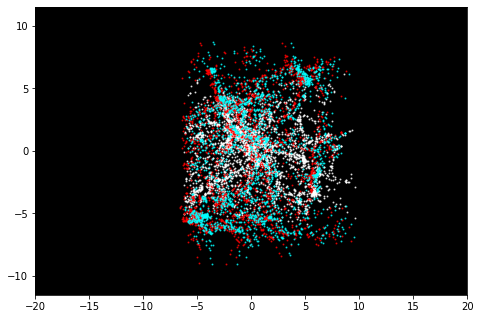

In [5]:
cube.video_3D(vid_cam.trajectory, scale=10**(-3.5), popout=17500*10**(-3.5), perspective=3., outsize=[40., 23.])

### Another example with 'circle' trajectories

(Any type of trajectory can be combined)

In [6]:
circ_cam = course([20,0,0])
circ_cam.circle([0,20,0], 100)
circ_cam.circle([0,0,20], 100)
circ_cam.helicopter([20,0,0], 150)

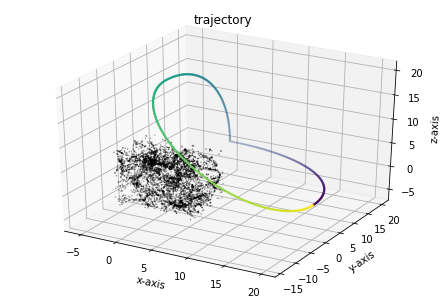

In [7]:
fig = plt.figure()
ax = Axes3D(fig)
 

ax.scatter(circ_cam.trajectory[:,0], circ_cam.trajectory[:,1], circ_cam.trajectory[:,2],\
            c=np.arange(circ_cam.trajectory.shape[0]), s=2)
ax.scatter(data[:,0]*10**(-3.5), data[:,1]*10**(-3.5), data[:,2]*10**(-3.5), c='k', s=0.1)

ax.set_title("trajectory")
ax.set_xlabel("x-axis")
ax.set_ylabel("y-axis")
ax.set_zlabel("z-axis")

plt.show()

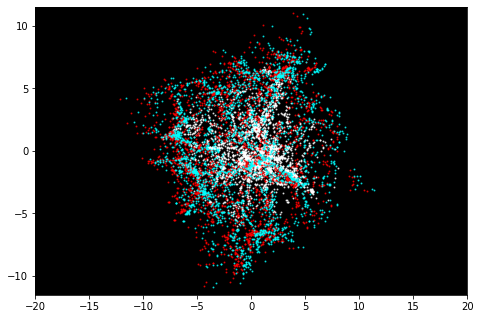

In [8]:
cube.video_3D(circ_cam.trajectory, scale=10**(-3.5), popout=17500*10**(-3.5), perspective=3., outsize=[40., 23.])